# Démarche analyse

## Importer les bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import euclidean

## Analyse préliminaire des données

In [2]:
def load_data(filepath):
    """
    Charge les données à partir du fichier CSV.
    """
    data = pd.read_csv(filepath, sep=',')
    return data

In [3]:
data = load_data('../data/data.csv')

In [4]:
data.head()

,StudentID,FirstName,FamilyName,sex,age,address,famsize,Pstatus,Medu,Fedu,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,Rafael,Morais,F,18,U,GT3,A,4,4,...,no,no,4,3,4,1,1,3,6,6
1,1,Lara,Braga,F,17,U,GT3,T,1,1,...,yes,no,5,3,3,1,1,3,4,6
2,2,Gonçalo,Azevedo,F,15,U,LE3,T,1,1,...,yes,no,4,3,2,2,3,3,10,10
3,3,Lara,Perna,F,15,U,GT3,T,4,2,...,yes,yes,3,2,2,1,1,5,2,15
4,4,João,Pires,F,16,U,GT3,T,3,3,...,no,no,4,3,2,1,2,5,4,10


In [5]:
data.info() # Quelques informations sur le dataset, il y'a 357 lignes et 33 colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   357 non-null    int64 
 1   FirstName   357 non-null    object
 2   FamilyName  357 non-null    object
 3   sex         357 non-null    object
 4   age         357 non-null    int64 
 5   address     357 non-null    object
 6   famsize     357 non-null    object
 7   Pstatus     357 non-null    object
 8   Medu        357 non-null    int64 
 9   Fedu        357 non-null    int64 
 10  Mjob        357 non-null    object
 11  Fjob        357 non-null    object
 12  reason      357 non-null    object
 13  guardian    357 non-null    object
 14  traveltime  357 non-null    int64 
 15  studytime   357 non-null    int64 
 16  failures    357 non-null    int64 
 17  schoolsup   357 non-null    object
 18  famsup      357 non-null    object
 19  paid        357 non-null    object
 20  activities

- **StudentID** : un identifiant unique pour chaque élève
- **sex** : sexe de l'élève (binaire : 'F' - féminin ou 'M' - masculin)
- **age** : âge de l'élève (numérique : de 15 à 22 ans)
- **address** : type d'adresse de l'élève (binaire : 'U' - urbain ou 'R' - rural)
- **famsize** : taille de la famille (binaire : 'LE3' - moins ou égal à 3 ou 'GT3' - plus de 3)
- **Pstatus** : état de cohabitation des parents (binaire : 'T' - vivant ensemble ou 'A' - séparés)
- **Medu** : niveau d'éducation de la mère (numérique : 0 - aucun, 1 - éducation primaire (4e année), 2 - de la 5e à la 9e année, 3 - éducation secondaire, ou 4 - enseignement supérieur)
- **Fedu** : niveau d'éducation du père (numérique : 0 - aucun, 1 - éducation primaire (4e année), 2 - de la 5e à la 9e année, 3 - éducation secondaire, ou 4 - enseignement supérieur)
- **Mjob** : emploi de la mère (nominal : 'teacher' - enseignante, 'health' - secteur de la santé, 'services' civils (ex. : administratif ou police), 'at_home' - au foyer ou 'other' - autre)
- **Fjob** : emploi du père (nominal : 'teacher' - enseignant, 'health' - secteur de la santé, 'services' civils (ex. : administratif ou police), 'at_home' - au foyer ou 'other' - autre)
- **reason** : raison du choix de l'école (nominal : proche de la 'home' - maison, 'school reputation' - réputation de l'école, 'course' - préférence de cours, ou 'other' - autre)
- **guardian** : tuteur de l'élève (nominal : 'mother' - mère, 'father' - père ou 'other' - autre)
- **traveltime** : temps de trajet entre la maison et l'école (numérique : 1 - <15 min., 2 - 15 à 30 min., 3 - 30 min. à 1 heure, ou 4 - >1 heure)
- **studytime** : temps d'étude hebdomadaire (numérique : 1 - <2 heures, 2 - 2 à 5 heures, 3 - 5 à 10 heures, ou 4 - >10 heures)
- **failures** : nombre d'échecs scolaires précédents (numérique : n si 1 <= n < 3, sinon 4)
- **schoolsup** : soutien éducatif supplémentaire (binaire : oui ou non)
- **famsup** : soutien éducatif familial (binaire : oui ou non)
- **paid** : cours particuliers payants en mathématiques ou portugais (binaire : oui ou non)
- **activities** : activités extrascolaires (binaire : oui ou non)
- **nursery** : a fréquenté une école maternelle (binaire : oui ou non)
- **higher** : souhaite poursuivre des études supérieures (binaire : oui ou non)
- **internet** : accès à Internet à la maison (binaire : oui ou non)
- **romantic** : en relation amoureuse (binaire : oui ou non)
- **famrel** : qualité des relations familiales (numérique : de 1 - très mauvaise à 5 - excellente)
- **freetime** : temps libre après l'école (numérique : de 1 - très faible à 5 - très élevé)
- **goout** : sorties avec des amis (numérique : de 1 - très faible à 5 - très élevé)
- **Dalc** : consommation d'alcool pendant les jours de travail (numérique : de 1 - très faible à 5 - très élevé)
- **Walc** : consommation d'alcool pendant le week-end (numérique : de 1 - très faible à 5 - très élevé)
- **health** : état de santé actuel (numérique : de 1 - très mauvais à 5 - très bon)
- **absences** : nombre d'absences scolaires (numérique : de 0 à 93)
- **FinalGrade** : note finale en mathématiques (numérique : de 0 à 20, cible de sortie)

In [6]:
def prepare_data(data, method='correlation'):
    """
    Prépare les données en fonction de la méthode choisie (correlation ou mlp)
    
    - Si la méthode est 'correlation', seules les colonnes numériques sont conservées
    - Si la méthode est 'MLP', les colonnes catégorielles sont encodées
    
    Args:
        data: Le dataframe brut.
        method (str): La méthode de préparation ('correlation' ou 'mlp').
    
    Returns:
        Le dataframe avec les données préparées.
    """
    
    # Suppression des colonnes non pertinentes
    data = data.drop(columns=['StudentID', 'FirstName', 'FamilyName'])
    
    if method == 'correlation':
        # Pour la corrélation, ne garder que les colonnes numériques
        data = data.select_dtypes(include=['int64'])
    
    elif method == 'mlp':
        # Pour le MLP, on encode les variables catégorielles
        categorical_columns = data.select_dtypes(include=['object']).columns
        label_encoder = LabelEncoder()

        for col in categorical_columns:
            data[col] = label_encoder.fit_transform(data[col])
    
    return data

In [7]:
data_corr = prepare_data(data)

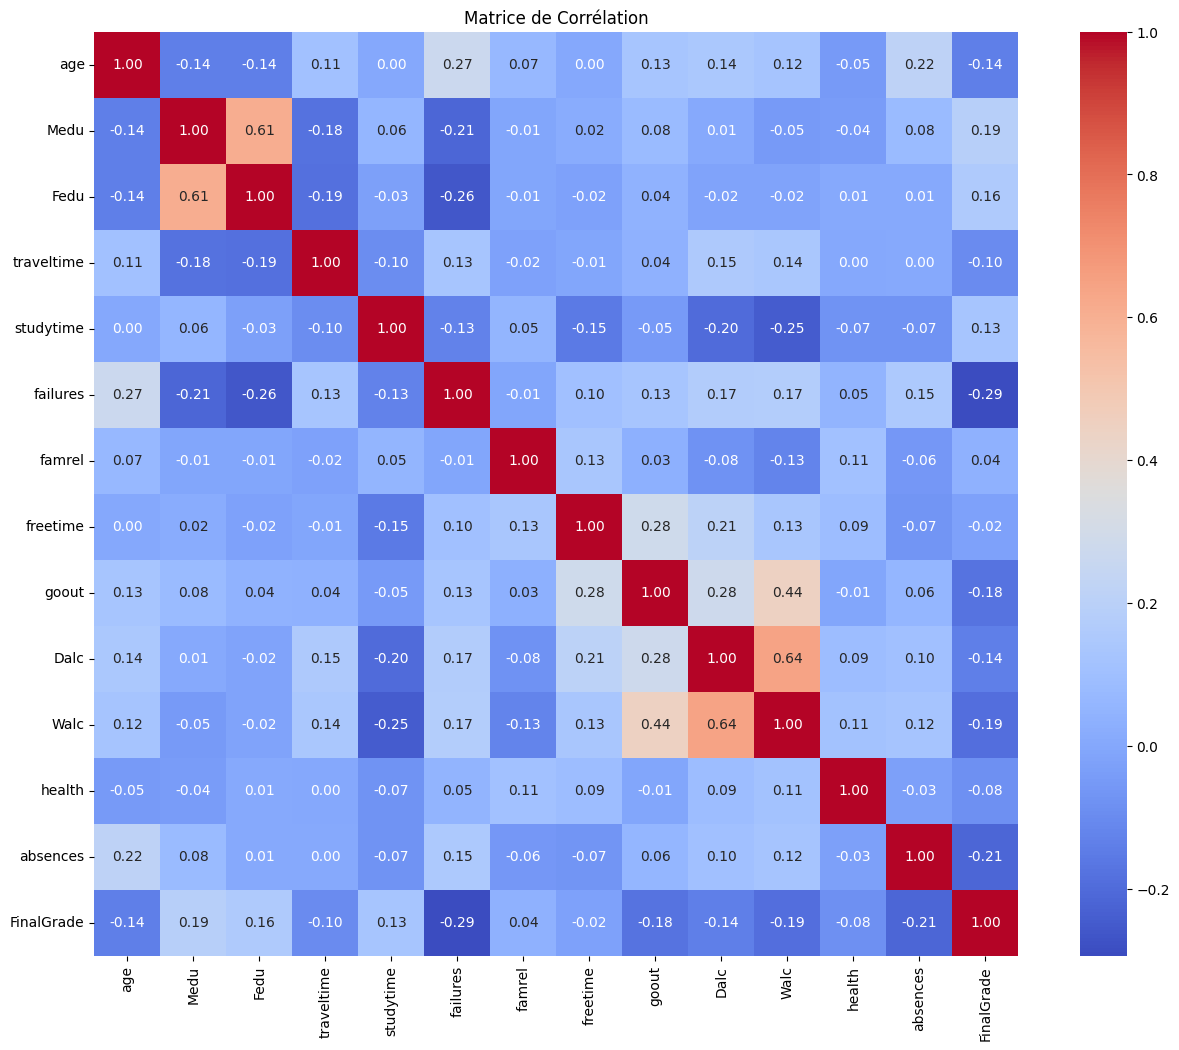

In [8]:
#numeric_data = data.select_dtypes(include=['int64'])
correlation_matrix = data_corr.corr()

# La matrice de corrélation sous forme de heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matrice de Corrélation')
plt.show()

In [9]:
# Corrélation de chaque variable avec la note finale
correlation_matrix.iloc[-1]

age          -0.140372
Medu          0.190308
Fedu          0.158811
traveltime   -0.099785
studytime     0.126728
failures     -0.293831
famrel        0.037711
freetime     -0.021589
goout        -0.177383
Dalc         -0.140690
Walc         -0.190054
health       -0.081691
absences     -0.213129
FinalGrade    1.000000
Name: FinalGrade, dtype: float64

Les **échecs** (-0.29), les **absences** (-0.21), les **sorties** (-0.18), et la **consommation d'alcool** (-0.14 en semaine, -0.19 le week-end) sont fortement corrélés à une baisse des notes finales. À l'inverse, le **temps d'étude** (+0.13) et le niveau d'éducation des parents (**Medu** +0.19, **Fedu** +0.16) ont une corrélation positive avec de meilleures performances scolaires.

## Calcul de la métrique de complexité

### 1ère méthode: à partir de la corrélation

In [66]:
def calculate_complexity_from_correlation(data, target_column):
    """
    Calcule la complexité d'accompagnement en utilisant les coefficients de corrélation des features
    avec la note finale. 
    
    Args:
    - data: dataframe initial contenant les données.
    - target_column: La colonne de la note finale, qui servira de cible pour le calcul de corrélation.
    
    Returns:
    - data: dataframe avec une nouvelle colonne 'Complexity' représentant la complexité normalisée.
    - correlations: Série contenant les coefficients de corrélation entre les features et la note finale.
    """
    
    # Séparation des features (X) et de la cible (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Calcul des coefficients de corrélation des features avec la note finale
    correlations = X.corrwith(y)
    
    # Calcul de la complexité en prenant en compte le signe des corrélations
    complexity = pd.Series(0, index=X.index)  # Initialise la série des complexités à zéro
    
    # Ajout ou soustraction de la contribution de chaque feature en fonction de la corrélation
    for feature in X.columns:
        if correlations[feature] >= 0:
            complexity += X[feature]*correlations[feature]
        else:
            complexity += (X[feature].max() - X[feature])*correlations[feature]
    
    # Normalisation entre 0 et 10
    scaler = MinMaxScaler(feature_range=(0,10))
    complexity = scaler.fit_transform(complexity.values.reshape(-1,1))
    
    data['Complexity'] = complexity
    
    return data, correlations

In [67]:
data_corr, _ = calculate_complexity_from_correlation(data_corr, 'FinalGrade')

### 2ème méthode : Entraînement d'un MLP

In [14]:
data = prepare_data(data, method='mlp')

In [15]:
# Détecter les duplicats
duplicated_rows = data[data.duplicated()]
duplicated_rows

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade


Il n'a pas de duplicats dans le dataset

In [16]:
print(data.isnull().sum())

sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
FinalGrade    0
dtype: int64


Il n'a pas de valeurs nan dans le dataset

In [17]:
# Définir un MLP (Multi-Layer Perceptron) avec une couche de représentation
class MLPComplexity(nn.Module):
    def __init__(self, input_size):
        """
        Initialisation du modèle MLP.

        Args:
            input_size: La taille de l'entrée, correspondant au nombre de features.
        """
        super(MLPComplexity, self).__init__()

        # Première couche entièrement connectée (input_size -> 64 neurones)
        self.fc1 = nn.Linear(input_size, 64)

        # Deuxième couche entièrement connectée (64 -> 32 neurones), 
        # cette couche de représentation réduit les données à 32 dimensions
        self.fc2 = nn.Linear(64, 32)

        # Troisième couche entièrement connectée (32 -> 1 neurone), 
        # prédiction finale de la note (output)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        """
        Passer les données à travers les différentes couches du réseau.

        Args:
            x (Tensor): Le tenseur d'entrée de taille (batch_size, input_size).

        Returns:
            output (Tensor): La prédiction finale, càd la note (de taille (batch_size, 1)).
            representation (Tensor): Le vecteur de représentation intermédiaire (de taille (batch_size, 32)).
        """
        # Appliquer la fonction d'activation ReLU à la sortie de la première couche
        x = torch.relu(self.fc1(x))

        # Obtenir le vecteur de représentation après la deuxième couche (32 dimensions)
        representation = torch.relu(self.fc2(x))

        # Obtenir la prédiction finale après la troisième couche
        output = self.fc3(representation)

        # Retourner à la fois la sortie (output) et la représentation intermédiaire (representation)
        return output, representation

In [18]:
# Fonction d'entraînement avec early stopping
def train_mlp_with_early_stopping(model, X_train, y_train, X_val, y_val, epochs=10000, lr=10**-5, patience=1000):
    """
    Entraîne un modèle MLP avec l'early stopping
    
    Args:
        model: Le modèle MLP à entraîner.
        X_train: Les données d'entraînement (features).
        y_train: Les labels d'entraînement (valeurs cibles).
        X_val: Les données de validation (features).
        y_val: Les labels de validation (valeurs cibles).
        epochs: Le nombre maximum d'époques (itérations) pour l'entraînement. Valeur par défaut : 10000
        lr: Le taux d'apprentissage pour l'optimiseur Adam. Valeur par défaut : 10**-5
        patience: Nombre d'époques sans amélioration avant de déclencher l'early stopping. Valeur par défaut : 1000
    
    Returns:
        None: Le modèle est modifié en place avec les poids du meilleur modèle sauvegardé.
    """

    criterion = nn.MSELoss() # Fonction de perte
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    best_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(epochs):
        # Phase d'entraînement
        model.train()
        inputs = torch.tensor(X_train, dtype=torch.float32)
        labels = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
        
        # Forward pass
        outputs, _ = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Phase de validation
        model.eval()
        val_inputs = torch.tensor(X_val, dtype=torch.float32)
        val_labels = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
        with torch.no_grad():
            val_outputs, _ = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
        
        # Condition de l'early stopping
        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            patience_counter = 0
            best_model = model.state_dict()
        else:
            patience_counter += 1
        
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
            
        if patience_counter >= patience:
            model.load_state_dict(best_model)
            break

In [19]:
def split_data(data, target_column):
    """
    Divise le df en ensembles de données d'entraînement, de validation et de test.
    """

    X = data.drop(columns=[target_column]).values
    y = data[target_column].values
    
    # Diviser en train/val/test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [21]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, 'FinalGrade')

In [22]:
X_test.shape[0] + X_val.shape[0] + X_train.shape[0] == data.shape[0]

True

In [54]:
# Définir le modèle
input_size = X_train.shape[1]  # Nombre de features
model = MLPComplexity(input_size)

In [55]:
%time train_mlp_with_early_stopping(model, X_train, y_train, X_val, y_val, epochs=10000, lr=10**-4, patience=1000)

Epoch [100/10000], Loss: 117.0602, Val Loss: 108.9470
Epoch [200/10000], Loss: 75.1743, Val Loss: 68.9081
Epoch [300/10000], Loss: 32.9942, Val Loss: 28.7482
Epoch [400/10000], Loss: 17.4141, Val Loss: 15.0943
Epoch [500/10000], Loss: 14.3558, Val Loss: 13.2358
Epoch [600/10000], Loss: 11.9602, Val Loss: 11.5480
Epoch [700/10000], Loss: 10.5733, Val Loss: 10.6911
Epoch [800/10000], Loss: 9.8894, Val Loss: 10.3509
Epoch [900/10000], Loss: 9.4781, Val Loss: 10.2344
Epoch [1000/10000], Loss: 9.1310, Val Loss: 10.2257
Epoch [1100/10000], Loss: 8.8373, Val Loss: 10.3056
Epoch [1200/10000], Loss: 8.6038, Val Loss: 10.4181
Epoch [1300/10000], Loss: 8.4197, Val Loss: 10.5294
Epoch [1400/10000], Loss: 8.2704, Val Loss: 10.6136
Epoch [1500/10000], Loss: 8.1499, Val Loss: 10.6681
Epoch [1600/10000], Loss: 8.0489, Val Loss: 10.6750
Epoch [1700/10000], Loss: 7.9608, Val Loss: 10.6636
Epoch [1800/10000], Loss: 7.8839, Val Loss: 10.6472
Epoch [1900/10000], Loss: 7.8167, Val Loss: 10.6184
Wall time: 5

In [29]:
def get_student_representation(model, student_data):
    """
    Obtient la représentation vectorielle d'un nouvel étudiant à partir du MLP entraîné.
    """
    
    # Convertir en tenseur et passer par le modèle
    student_tensor = torch.tensor(student_data, dtype=torch.float32).unsqueeze(0)
    model.eval()
    with torch.no_grad():
        _, representation = model(student_tensor)
    
    return representation.squeeze().numpy()

In [30]:
# calcul de la distance euclidienne entre la représentation d'un nouvel élève et une référence
def compare_to_reference(representation, reference_representation):
    representation = representation.squeeze()
    reference_representation = reference_representation.squeeze()
    distance = euclidean(representation, reference_representation)
    return distance

In [56]:
# Sélectionner l'étudiant ayant eu 20 (considéré comme référence)
student_index = np.where(y_train==20)[0]
student_data = X_train[student_index[0]]
reference_representation = get_student_representation(model, student_data)
print("Représentation vectorielle de l'étudiant : \n", reference_representation)

Représentation vectorielle de l'étudiant : 
 [ 0.         0.         8.967397   0.         9.939534   0.
  0.         0.         0.         0.         0.         9.492647
  0.         0.        10.899211   0.         8.051193   0.
  7.9121222 11.08681    8.309733  12.783185   0.         0.
  0.         0.         0.         0.         7.145663   8.355024
  0.         0.       ]


In [57]:
# Nouvel étudiant
new_student_data = X_test[0]
representation = get_student_representation(model, new_student_data)
print("Représentation vectorielle de l'étudiant : \n", representation)

Représentation vectorielle de l'étudiant : 
 [ 0.          0.          7.4896293   0.          7.5871043   0.
  0.          0.          0.          0.96654046  2.1023595   8.045101
  0.          0.          9.191305    0.          6.7577424   0.
  6.0407906   9.73258     6.8194737  10.58153     0.          0.
  0.          0.          0.          0.          5.8435116   7.3538647
  0.          0.960683  ]


In [58]:
# Comparer l'élève avec la référence
distance = compare_to_reference(representation, reference_representation)
print(f"Distance de l'élève à la référence : {distance:.4f}")

Distance de l'élève à la référence : 5.9818


In [46]:
def calculate_and_assign_complexities(model, data, reference_representation):
    """
    Calcule la complexité de chaque élève et l'affecte au dataset.
    
    La complexité est définie comme la distance euclidienne entre la représentation
    d'un élève et celle de référence.
    
    Args:
        model: Le modèle MLP pré-entraîné.
        data: Le dataset initial.
        reference_representation: La représentation de référence pour calculer la complexité.
        
    Returns:
        data_with_complexity: Le dataset initial avec une colonne 'Complexity'.
    """
    complexities = []
    
    X = data.drop(columns=['FinalGrade']).values
    y = data['FinalGrade'].values
    
    # Pour chaque élève dans X, calculer la distance à la représentation de référence
    for student_data in X:
        # Obtenir la représentation de l'élève
        representation = get_student_representation(model, student_data)
        
        # Calculer la complexité comme la distance euclidienne à la référence
        complexity = euclidean(representation, reference_representation)
        complexities.append(complexity)
    
    data_with_complexity = data.copy()
    data_with_complexity['Complexity'] = complexities
    
    return data_with_complexity

In [59]:
data_with_complexity = calculate_and_assign_complexities(model, data, reference_representation)

## Dashboard

In [72]:
def plot_dashboard(data):
    """
    Trace un scatter plot de la note finale (FinalGrade) contre le score de complexité (ComplexityScore).
    """
    plt.figure(figsize=(10,6))
    
    # Scatter plot de FinalGrade (note finale) vs Complexity (score de complexité)
    plt.scatter(data['FinalGrade'], data['Complexity'], alpha=0.8)
    plt.gca().invert_xaxis()
    
    plt.xlabel('FinalGrade')
    plt.ylabel('ComplexityScore')
    plt.title('Dashboard')
    plt.show()

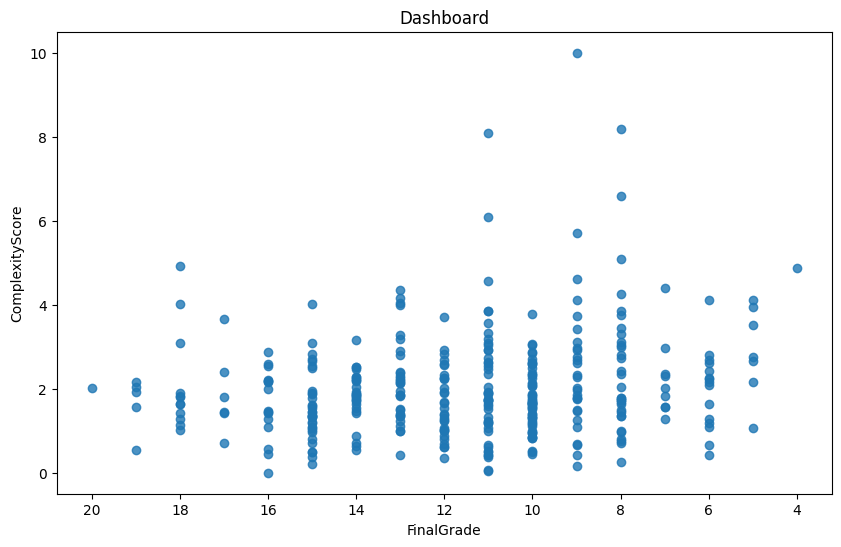

In [73]:
############ Avec la méthode de corrélation ##################
plot_dashboard(data_corr)

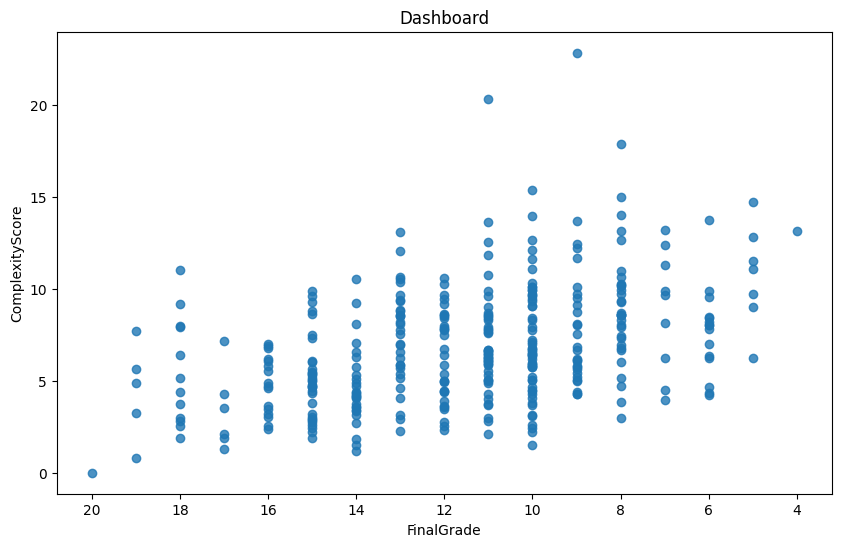

In [64]:
############ Avec la méthode de distance ##################
plot_dashboard(data_with_complexity)